# Figure plotting

In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import concat_tables, summarize_all_corpus_tables, visualize

## Mean f1 and cv-f1 scores for segmented prose corpus

In [ ]:
table = concat_tables("../data/tables/", "seg_prose")

In [ ]:
table2 = table
table2["clf"] = table2["clf"].str.split(pat=":", expand=True)

In [ ]:
table3 = table2.groupby(["clf"]).sum(axis=1)

In [ ]:
table4 = table3.div(6)
table4

In [ ]:
visualize(table4, 
          "bar_vertical", 
          classruns=10, 
          cross_validation=10,
          output_name="mean_scores_seg_prose",
          vectorization_method="bow")

## Mean F1-scores and CV-F1-scores for all experiments

In [2]:
path = "../data/analysis/experiments_summaries"
speeches_path = path + "/all_speeches_tables"
reduced_prose_path = path + "/all_reduced_prose_tables"
all_paths = {"speeches": speeches_path, "reduced_prose": reduced_prose_path}
vectorization_methods = ["tfidf", "zscore"]
drop_not_tuned = True

In [3]:
def vec_results_dict(path, 
                     tables,
                     vectorization_methods, 
                     drop_not_tuned=True):
    d = {}
    
    for vectorization_method in vectorization_methods:
        vect_table = [filename for filename in tables if vectorization_method in filename]
        tmp_df = summarize_all_corpus_tables(path, 
                                             vectorization_method, 
                                             2000,
                                             drop_not_tuned = True)
        
        
        tmp_df = tmp_df.astype(float)
        d[vectorization_method] = tmp_df
    return d

## visualize all classification results for the speeches and reduced_prose corpus

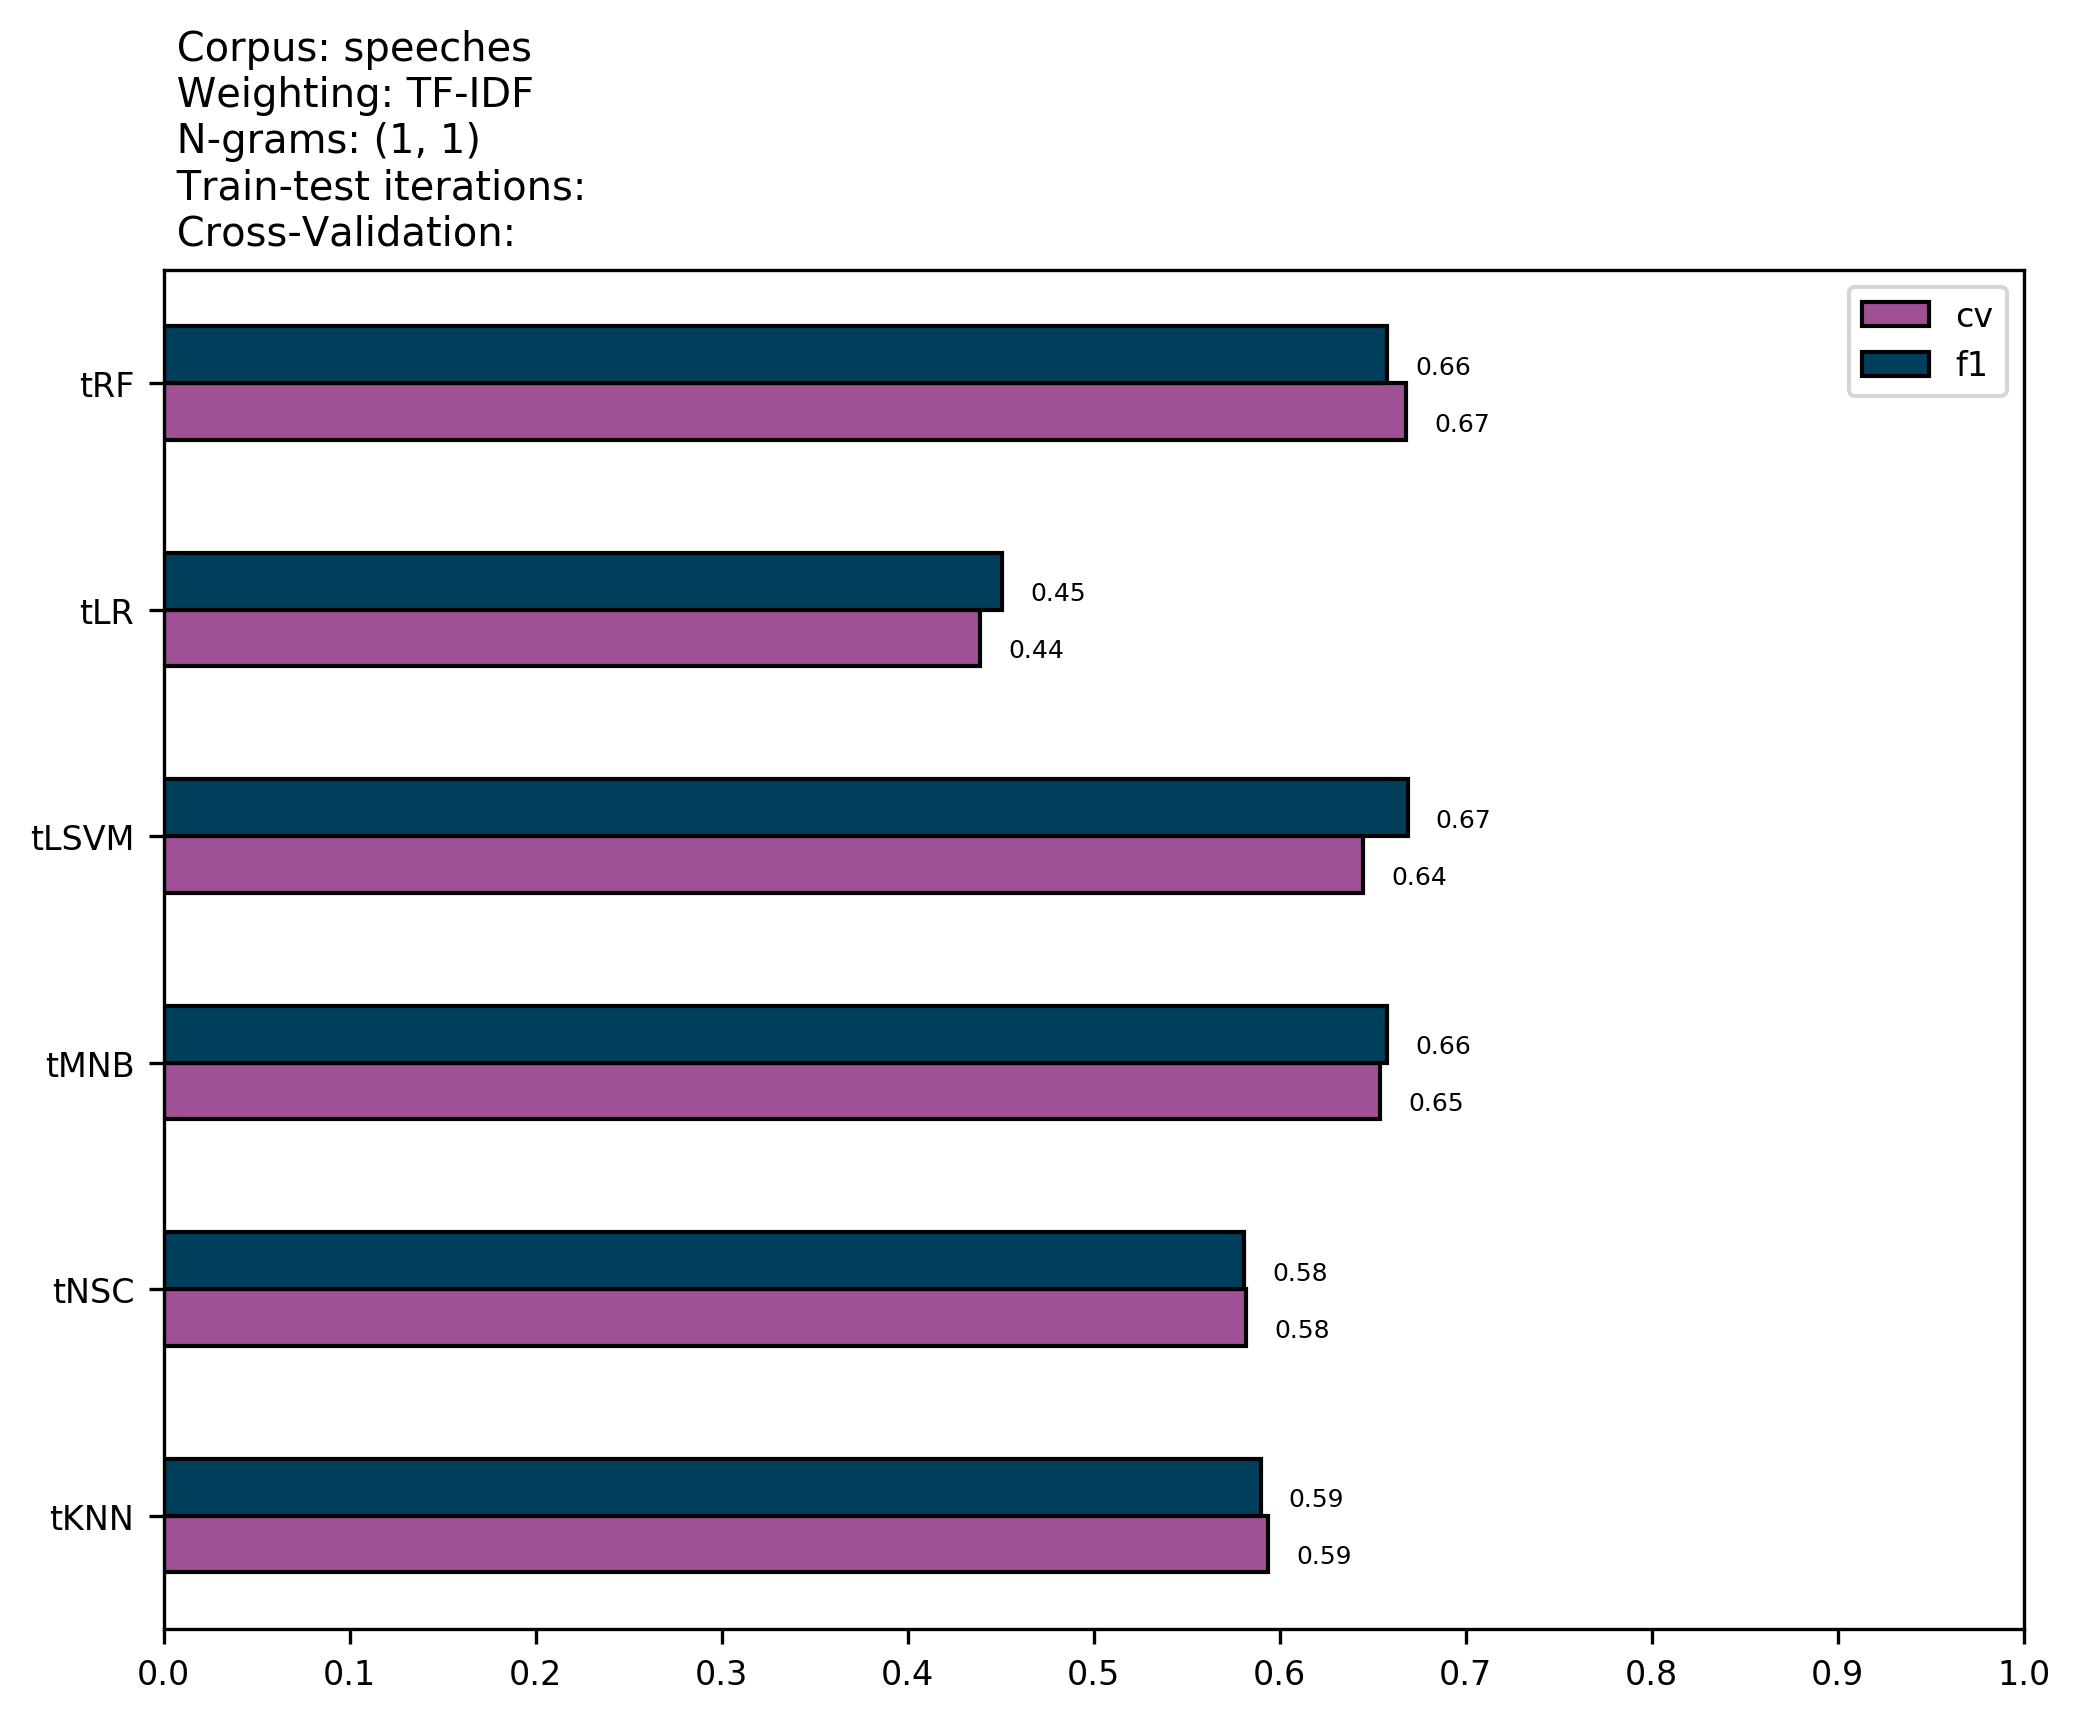

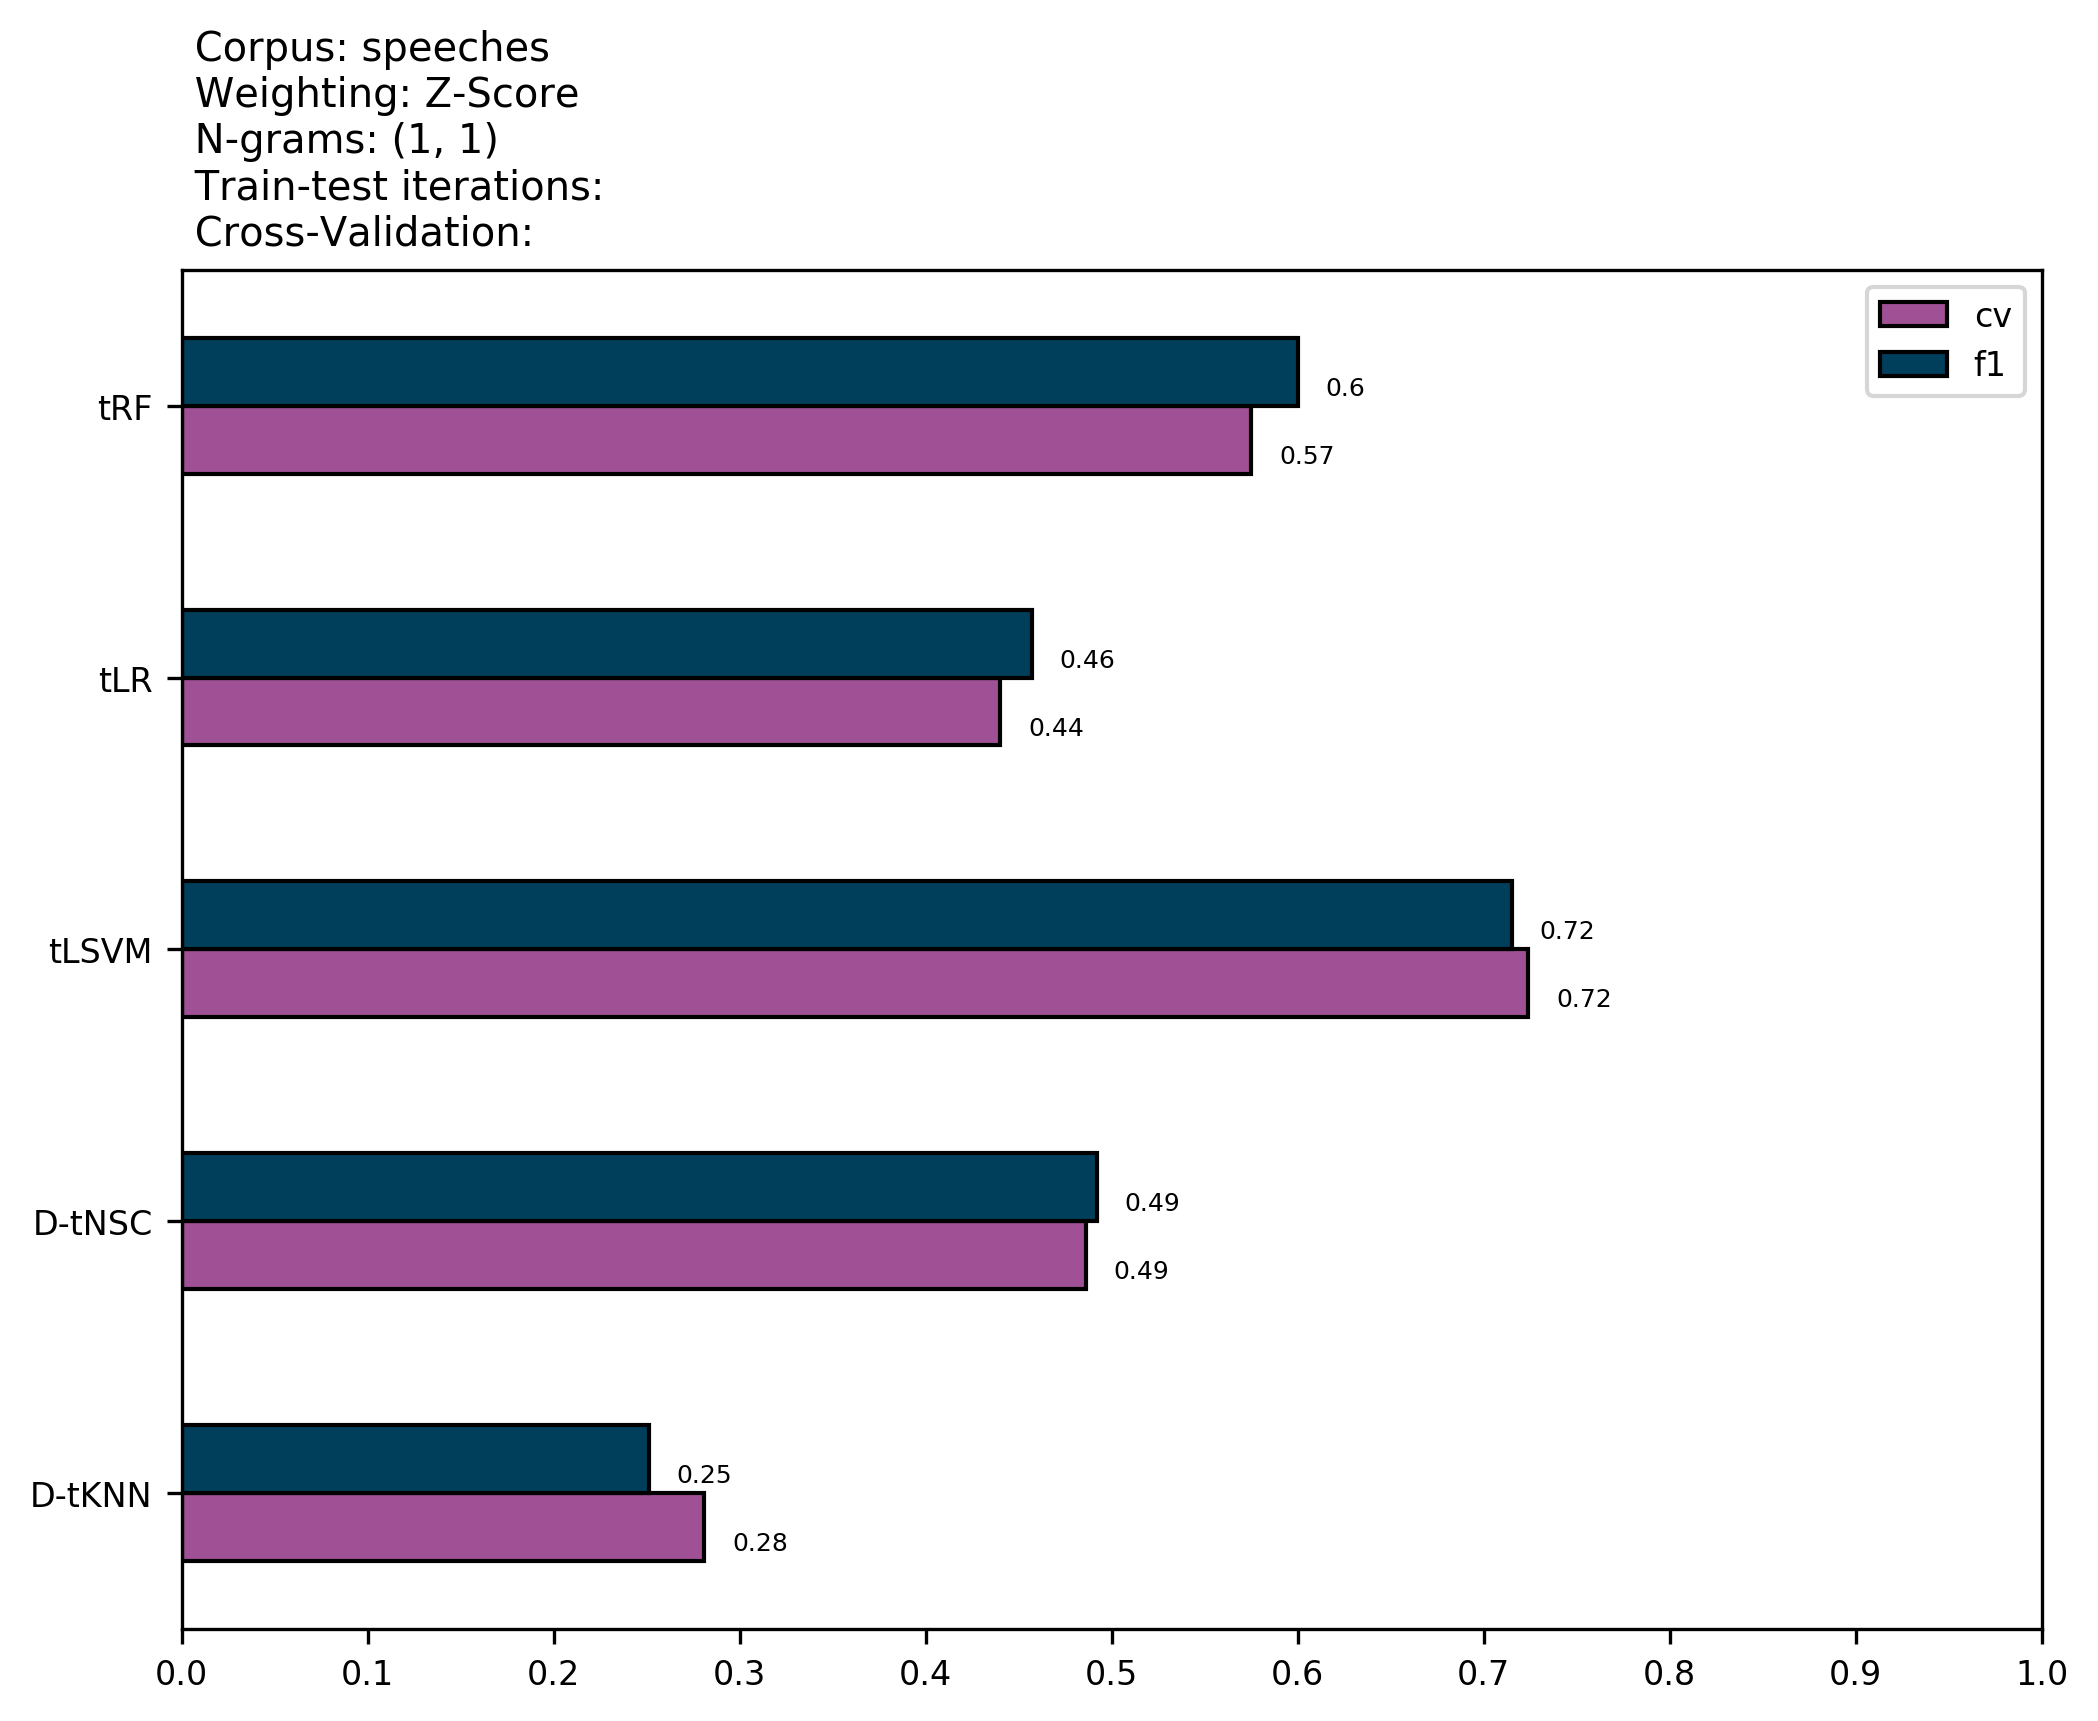

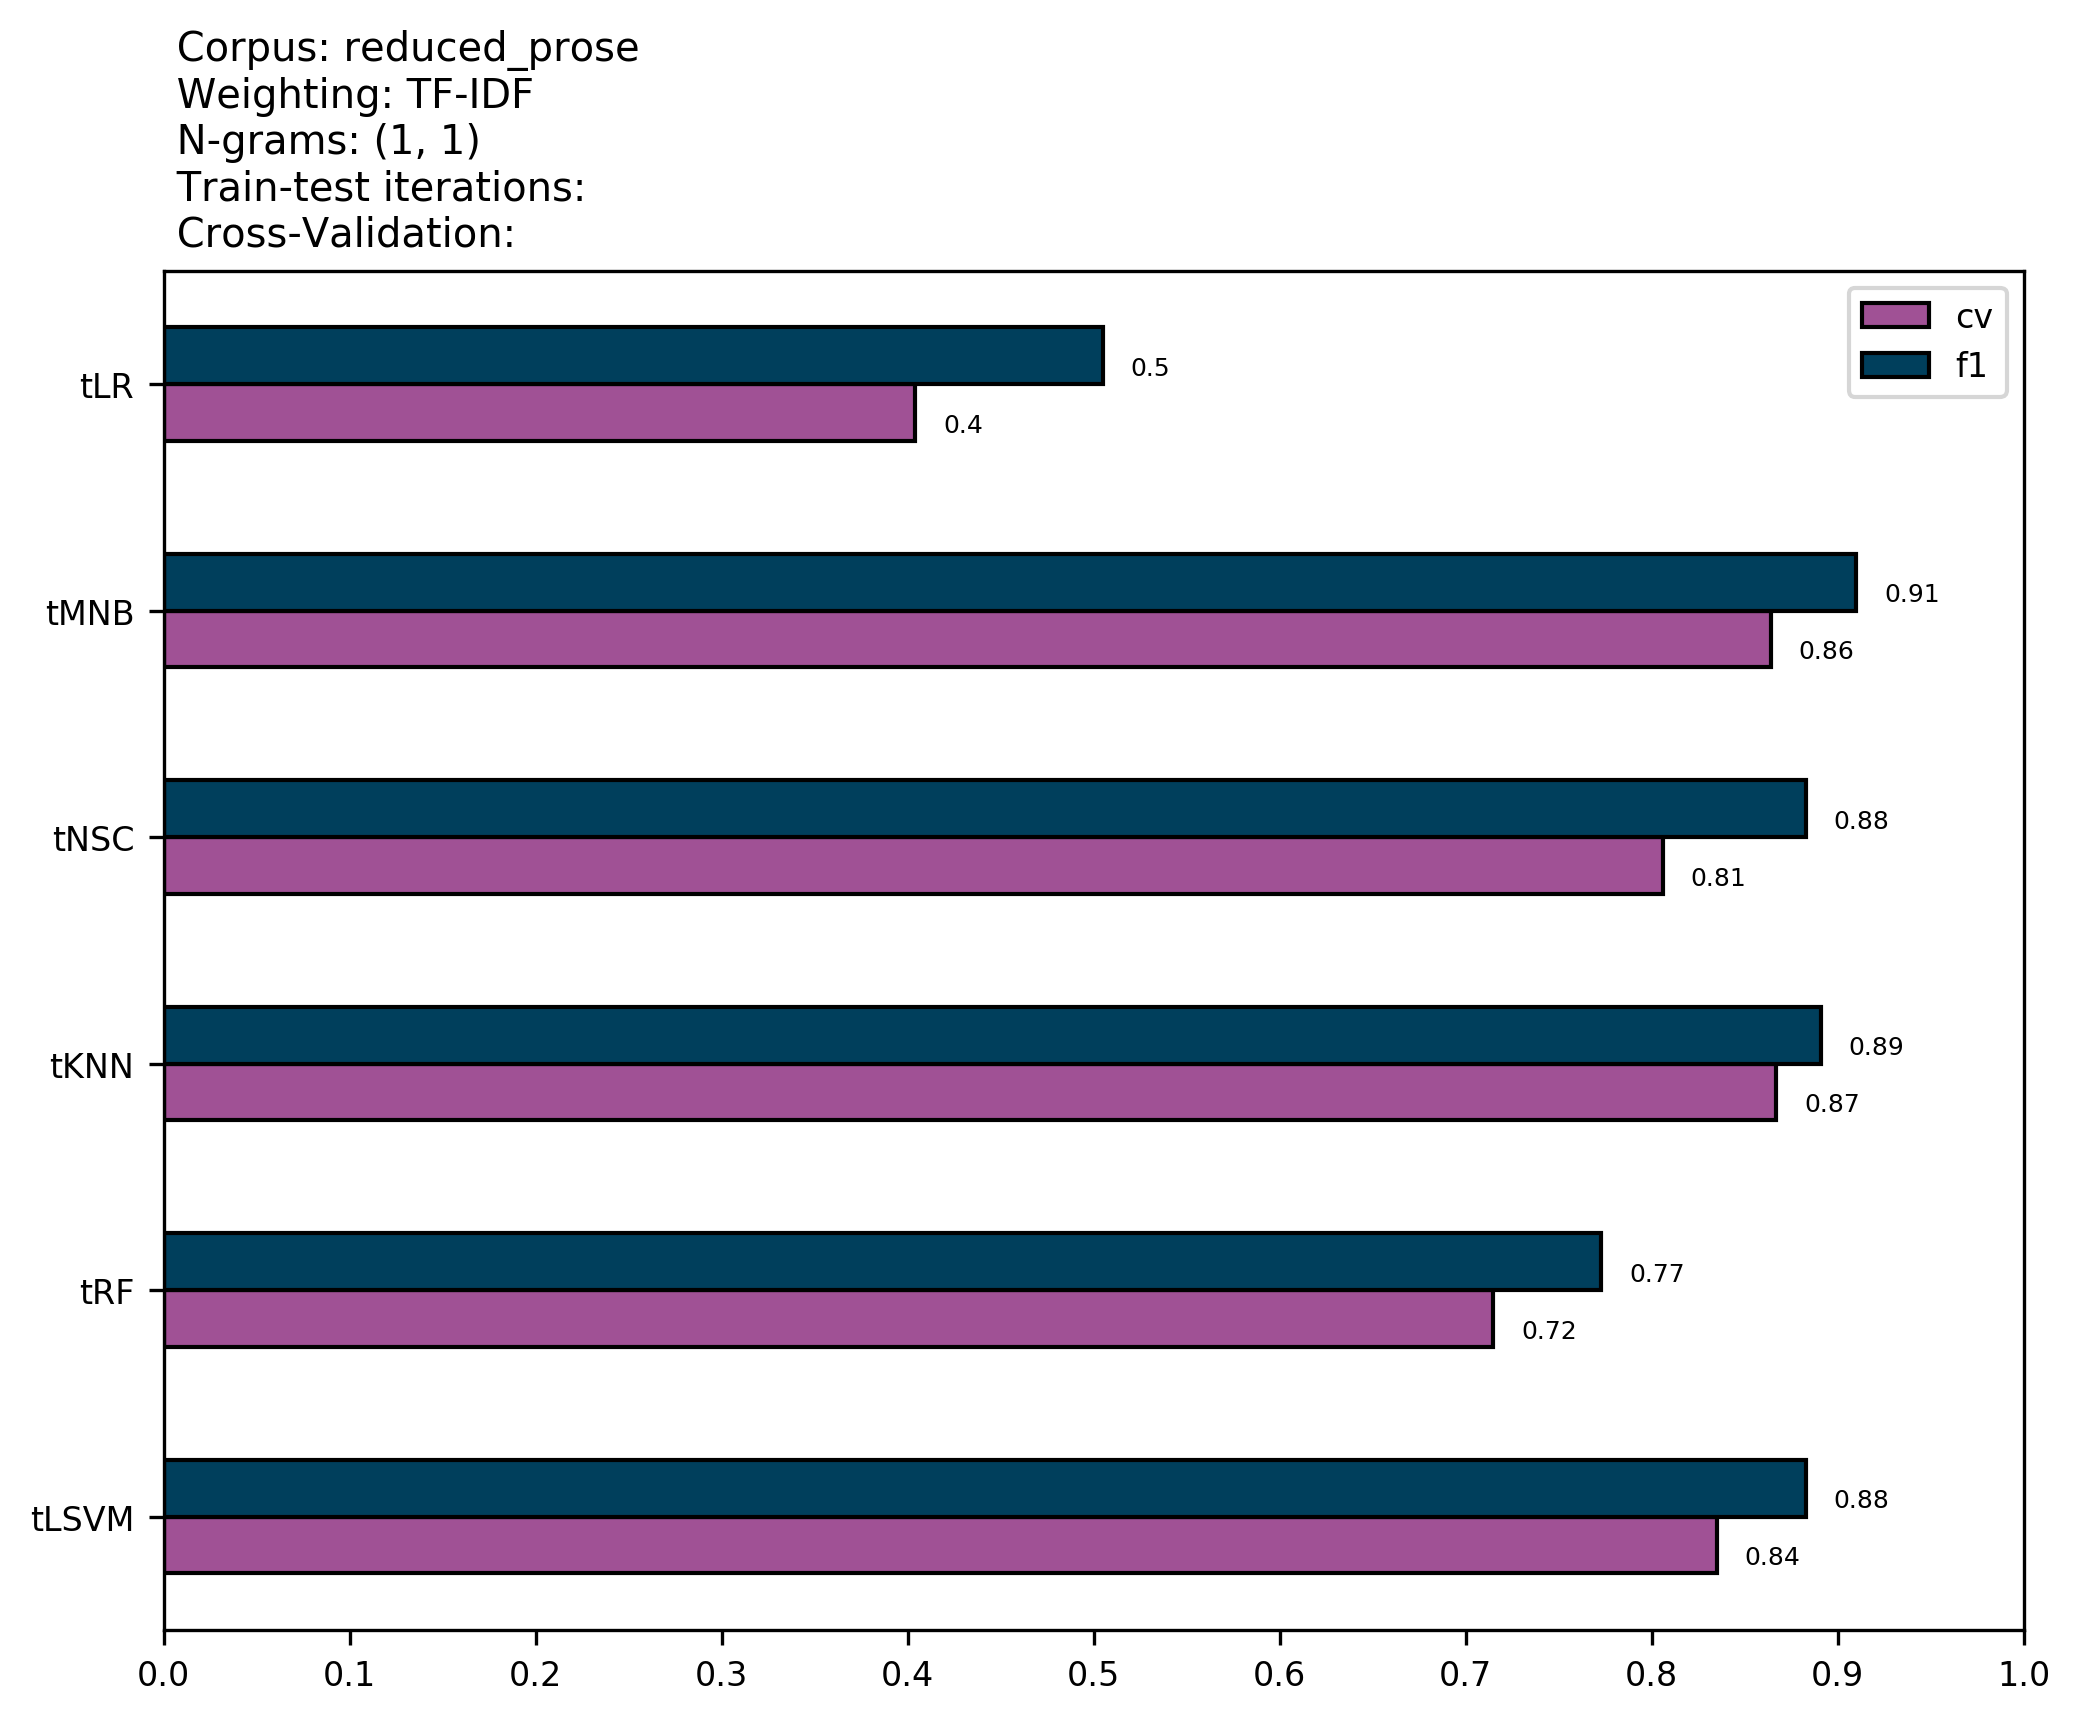

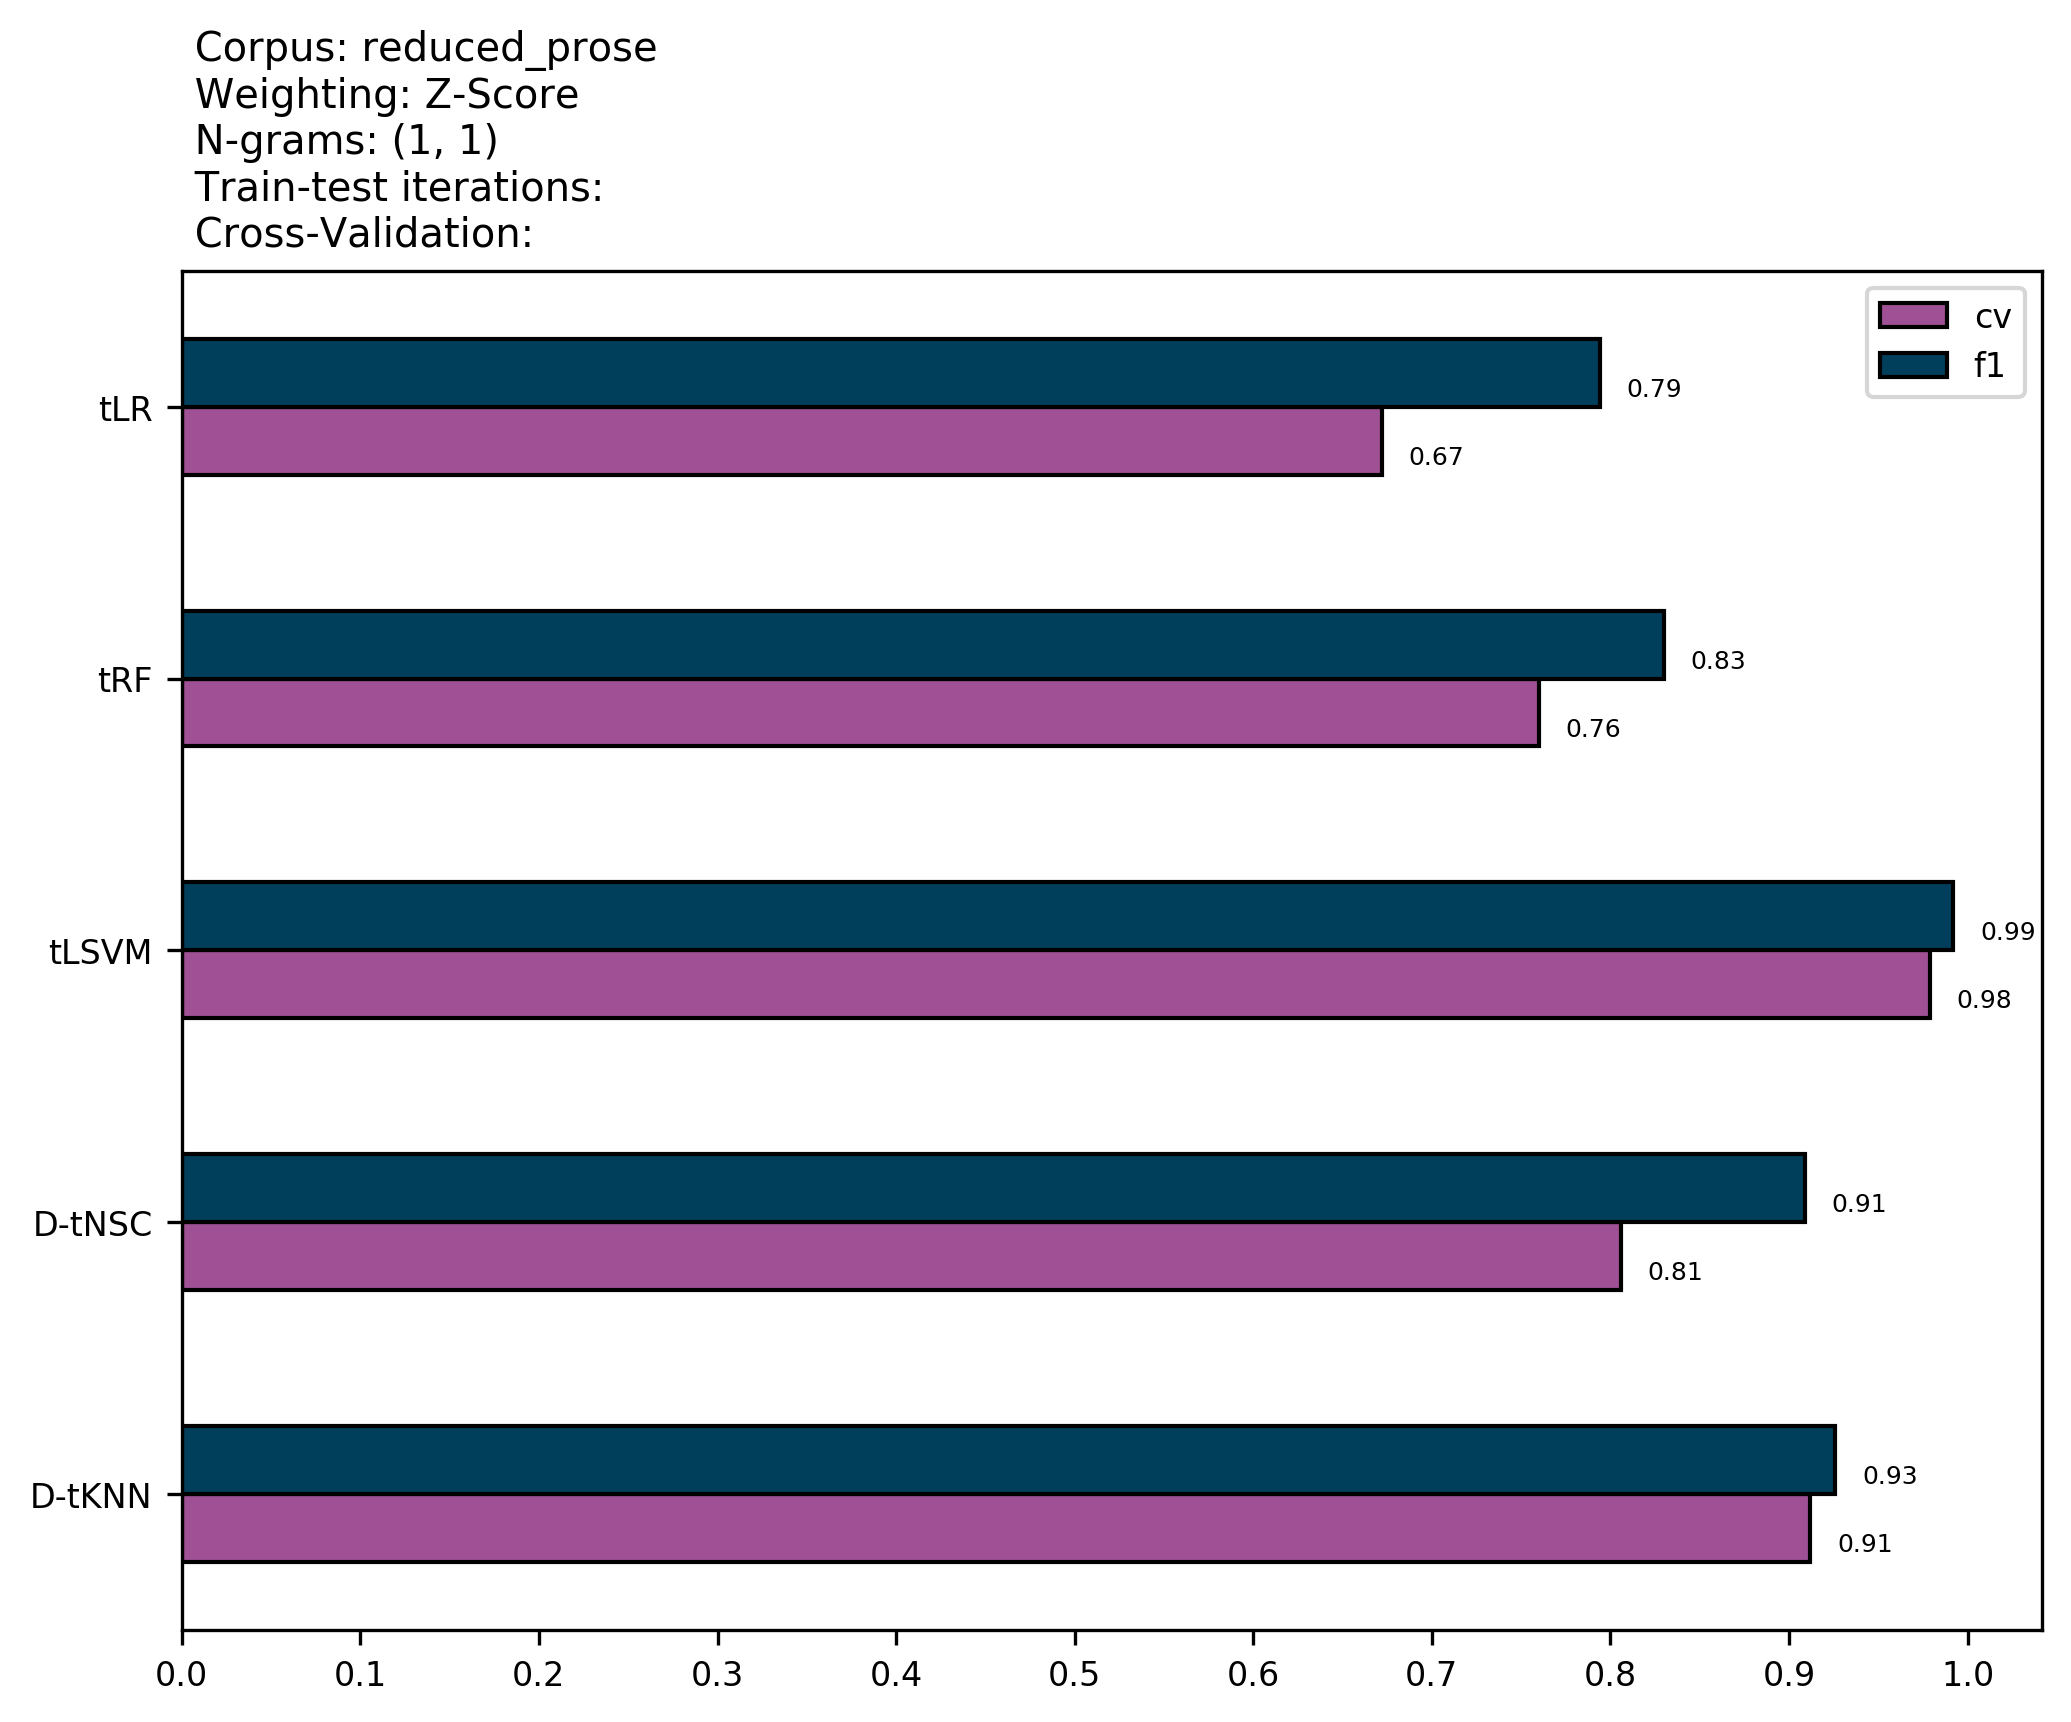

In [4]:
for corpusname, path in all_paths.items():
    tables = glob.glob(path + "/*.csv")
    d = vec_results_dict(path, 
                         tables,
                         vectorization_methods, 
                         drop_not_tuned)
    d_tfidf = d["tfidf"]
    d_zscore = d["zscore"]
    visualize(d_tfidf, 
              "bar_horizontal",
              "",
              "",
              max_features = "2000", 
              vectorization_method="tfidf",
              output_name=corpusname)
    visualize(d_zscore, 
              "bar_horizontal",
              "",
              "",
              max_features = "2000", 
              vectorization_method="zscore",
              output_name=corpusname)